In [1]:
#Importing Data from the CSV file
%matplotlib inline
import string
import math
import numpy as np
import matplotlib.pyplot as plt

f_train = open("training.1600000.processed.noemoticon.csv", "r", encoding="ISO-8859-1")
X_train = f_train.readlines()
f_test = open("testdata.manual.2009.06.14.csv", "r")
X_test = f_test.readlines()

#Creating the List with just the tweets and finding the number of positive and negative classes. (TRAINING) 
#class_0 = number of classes with label = 0
#class_4 = number of classes with label = 4

class_0=class_4=0
tweets_train =[]
for x in X_train:
    a = x.split('","')
    if (a[0] == '"0'): class_0+=1
    else: class_4+=1
    tweets_train.append('%s"|"%s' % (a[0],a[-1]))

#Creating the List with just the tweets (TEST DATA)
tweets_test =[]
for x in X_test:
    a = x.split('","')
    tweets_test.append('%s"|"%s' % (a[0], a[-1]))
    
print("The length of the training set is = ", len(X_train))
print("The number of classes (label=4) =", class_4)
print("The number of classes (label=0) =", class_0)
print("The length of the test set is = ", len(X_test))

f_test.close()
f_train.close()

The length of the training set is =  1600000
The number of classes (label=4) = 800000
The number of classes (label=0) = 800000
The length of the test set is =  359


In [2]:
from nltk.tokenize import word_tokenize
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')
import pandas as pd

[nltk_data] Downloading package stopwords to /home/ayushi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ayushi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import dill
dill.load_session('ques1_d_dump.db')

Text(0, 0.5, 'No of words')

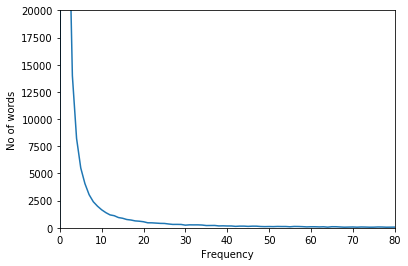

In [19]:
nw = [0 for i in range(max(dictionary.values())+1)] 
f = [i for i in range(max(dictionary.values())+1)] 
for key in dictionary:
    nw[dictionary[key]]+=1
plt.plot(f,nw)
plt.axis([0, 80, 0, 20000])
plt.xlabel("Frequency")
plt.ylabel("No of words")
#plt.show()

In [9]:
# (1) Feature - We see that the number of words with very less frequency is very high. So we can actually 
# Discard those words since they will not play much role in deciding the class of a tweet
# This would be for words like numbers, or language specific words like muera, wrong spelling words, etc. 
# We don't need to modify dict_0 and dict_4 since they will only be accessed for words found in the global
# dictionary 

cutoff_freq = 40
n_cutoff = len(dictionary)-sum(num_words[0:cutoff_freq]) 
print("Number of words with frequency higher than cutoff frequency({}) :".format(cutoff_freq),n_cutoff)

Number of words with frequency higher than cutoff frequency(40) : 11965


In [10]:
dictionary_new = {}
for key in dictionary:
    if dictionary[key] >=cutoff_freq:
        dictionary_new[key]=dictionary[key]

In [11]:
m= len(X_train)
phi_0 = class_0/m
phi_4 = class_4/m


In [12]:
def train_nb_classifier(dictionary, dict_0, dict_4, len_tweets, n_0, n_4, class_0, class_4):
    v = len(dictionary)
    theta_0 = {}
    theta_4 = {}
    n_0 = sum(n_0) # Sum of all the length of the tweets in class 0
    n_4 = sum(n_4) # Sum of all the length of the tweets in class 0
    c=1
    for word in dictionary.keys():
            if word in dict_0:
                theta_0[word] = ((dict_0[word]+c)/(n_0 + v*c))
            else:
                theta_0[word] = ((c) / (n_0 + v*c))
            if word in dict_4:
                theta_4[word] = ((dict_4[word]+c)/(n_4 + v*c))
            else:
                theta_4[word] = ((c)/(n_4 + v*c))
    return theta_0,theta_4;

In [13]:
theta_0, theta_4 = train_nb_classifier(dictionary_new, dict_0, dict_4, n, n_0, n_4, class_0, class_4)

In [26]:
def test_data(tweets, theta_0, theta_4, actual_classes, phi_0, phi_4):
    pred_class=[]
    #actual_class=[]
    for x in tweets:
        test_class0=test_class4=0
        
        #Finding probability of tweet being in a class         
        for w in x:
            if w in theta_0: test_class0 += math.log(theta_0[w])
            else: test_class0 += math.log(1)
            if w in theta_4: test_class4 += math.log(theta_4[w])
            else: test_class4 += math.log(1)
        test_class0 += math.log(phi_0)
        test_class4 += math.log(phi_4)
        #Classifying the probability into classes
        if (test_class0 > test_class4): pred_class.append(0)
        else: pred_class.append(1)

    actual_class = actual_classes.apply(lambda x: 0 if x=='"0"' else 1).tolist()
    test_error = sum(np.bitwise_xor(actual_class, pred_class))
    accuracy = ((len(tweets) - test_error)/len(tweets))*100
    return accuracy, actual_class, pred_class;

In [27]:
train_accuracy,actual_class_train,pred_class_train = test_data(tweets_train_pd['lemma'], theta_0, theta_4, train_classes, phi_0, phi_4)
print("Result (a) : The train accuracy of the model on raw data is = {}%".format(train_accuracy))

Result (a) : The train accuracy of the model on raw data is = 76.7876875%


In [28]:
test_accuracy, actual_class,pred_class = test_data(tweets_test_pd['lemma'], theta_0, theta_4, test_actual_classes, phi_0, phi_4)
print("Result (a) : The test accuracy of the model on raw data is = {}%".format(test_accuracy))

Result (a) : The test accuracy of the model on raw data is = 82.72980501392759%


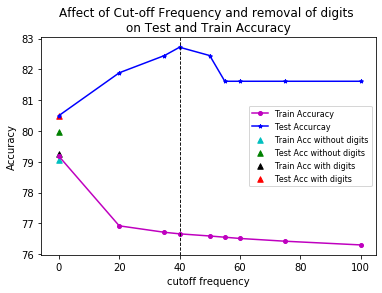

In [29]:
#Effect of cutoff-frequency on Train and Test Accuracy
cutoff = [0, 20, 35, 40, 50, 55, 60, 75, 100]
train_acc = [79.18, 76.92, 76.71,76.66,76.59,76.55,76.51,76.42,76.30]
test_acc = [80.50, 81.89, 82.45, 82.72, 82.45, 81.615, 81.615, 81.615, 81.615]
plt.plot(cutoff, train_acc, marker='o', markersize=4, c='m', label='Train Accuracy')
plt.plot(cutoff, test_acc, marker='*', markersize=4, c='b', label ='Test Accurcay')
plt.axvline(x=40, c='k', linestyle='--', linewidth=0.9)
plt.scatter(0,79.07, marker='^', s=30, c='c', label='Train Acc without digits')
plt.scatter(0,79.97, marker='^', s=30, c='g', label='Test Acc without digits')
plt.scatter(0,79.25, marker='^', s=30, c='k', label='Train Acc with digits')
plt.scatter(0,80.50, marker='^', s=30, c='r', label='Test Acc with digits')

plt.xlabel("cutoff frequency")
plt.ylabel("Accuracy")
plt.legend(fontsize=8)
plt.title("Affect of Cut-off Frequency and removal of digits \non Test and Train Accuracy")
#plt.savefig("cutoff_accuracy.png",dpi=1000, bbox_inches='tight')
plt.show()

In [35]:
import itertools 
list(itertools.combinations(tweets_train_pd['lemma'].get(0), 2))

[('awww', 'thats'),
 ('awww', 'bummer'),
 ('awww', 'shoulda'),
 ('awww', 'get'),
 ('awww', 'david'),
 ('awww', 'carr'),
 ('awww', 'third'),
 ('awww', 'day'),
 ('thats', 'bummer'),
 ('thats', 'shoulda'),
 ('thats', 'get'),
 ('thats', 'david'),
 ('thats', 'carr'),
 ('thats', 'third'),
 ('thats', 'day'),
 ('bummer', 'shoulda'),
 ('bummer', 'get'),
 ('bummer', 'david'),
 ('bummer', 'carr'),
 ('bummer', 'third'),
 ('bummer', 'day'),
 ('shoulda', 'get'),
 ('shoulda', 'david'),
 ('shoulda', 'carr'),
 ('shoulda', 'third'),
 ('shoulda', 'day'),
 ('get', 'david'),
 ('get', 'carr'),
 ('get', 'third'),
 ('get', 'day'),
 ('david', 'carr'),
 ('david', 'third'),
 ('david', 'day'),
 ('carr', 'third'),
 ('carr', 'day'),
 ('third', 'day')]